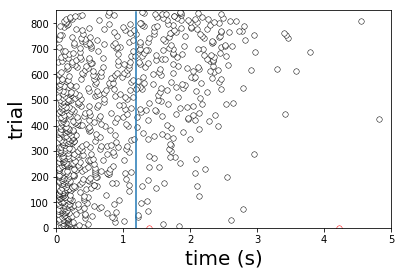

In [4]:
# ___________________________________________________________________________________________
# File:             plotDrrd.py
# File type:        Function
# Created on:       January, 14, 2019
# Created by:       Marcelo Bussotti Reyes
# Purpose:          A function that analyzes the performance of rats in the drrd
#                   procedure by plotting the trials 
#
# Input:            A matrix with 6 columns of data according to 
#                   the one produced by the function drrd.
#                   Each line of the matrix D is a trial
#                   Column 0 is the duration of the lever press
#                   Column 1 is the the time between the lever release and the next lever press (ITI)
#                   Column 2 is 1 for the reinforced trials
#                   Column 3 is 1 for trials where the light was on (valid trials)
#                   Column 4 shows the criterion (prime time) for each trial
#                   Column 5 is the session number
#
# Output:           A plot of the data contained in D and some statistics
#
#
# Format:           plotDrrd(D,'tittle label')
# Example:          d = plotDrrd(D,'191014-Session1'); 

#if nargin == 1
#  title_label = [];
#end

import numpy as np
import matplotlib.pyplot as plt


#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

D = np.load('D.npy')

primed  = 2
valid   = 3
primeT  = 4;
session = 5; 	# column with the session number

N = D.shape[0]

# --- looking for the specific trials ---
#validPrimed    =  find(D(:,primed)==1 	& D(:,valid)==1);
validPrimed    = [i for i in range(N) if (D[i,primed]==1 and D[i,valid]==1)]
validNonPrimed = [i for i in range(N) if (D[i,primed]==0 and D[i,valid]==1)]
invalid        = [i for i in range(N) if D[i,valid]==0] 

# --- plotting the prime times ---
plt.plot(D[:,primeT],range(N))#,'r','linewidth', 1.5);

# --- alternative: patch ---
#patch([ D(:,5); D(end,5); 0.00; 0.00], [1:N N+5 N+5 0], [.7 .8 .7] ,'EdgeColor' ,'none');% % [.7 .8 .7]
#patch([ D(:,5); D(end,5); 0.00; 0.00], [1:N N+5 N+5 0], [0 110 144]/255 ,'EdgeColor' ,'none');% % [.7 .8 .7]
#patch([ D(:,5); D(end,5); 0.00; 0.00], [1:N N+5 N+5 0], [0.8 0.8 0.8] ,'EdgeColor' ,'none');% % [.7 .8 .7]

# --- Plotting each trial in a different style ---
mycolor = [0,.8,.9]
mysize  = 30
lw      = 0.5
h = plt.scatter(D[validPrimed,0]   ,validPrimed,   s=mysize,  linewidths=lw, marker='o',c='w', edgecolors='k' )
h = plt.scatter(D[validNonPrimed,0],validNonPrimed,s=mysize,  linewidths=lw, marker='o',c='w', edgecolors='k' )
h = plt.scatter(D[invalid,0]       ,       invalid,s=mysize,  linewidths=lw, marker='o',c='w', edgecolors='r' )


# --- printing the lines dividing the sessions ---
div = np.where(np.diff(D[:,session]))[0]
for i in range(len(div)):
    plt.plot(plt.xlim,[div[i],div[i]])
    
# --- Plotting the moving average of the lever press durations ---
#plot(movingAverage(D(:,1),20),1:N,'linewidth',2);


# --- setting up the scale and title ---
plt.xlim((0,5))
plt.ylim((0,N+5))
plt.xlabel('time (s)',fontsize=20)
plt.ylabel('trial',fontsize=20)
#plt.title(title_label);

plt.show()


# --- mounting return variable ---
#return ([len(validPrimed)/N len(validNonPrimed)/N len(invalid)/N] *100)